# ML Researcher TTA from EonLabs
This is a problem solution for EonLabs Take-home Tech Assessment (TTA).

Author: Osama Elfar.

Date: September 9, 2022.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# import drive from google.colab to read datasets
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
hourly = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data/hourly_data.csv')
weekly = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data/weekly_data.csv')
monthly = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data/monthly_data.csv')

## Methodology
As the hourly data values are normalized seperatley for each week, the weekly data values will be used as weights for hourly values. i. e., each weekly value is a weight for its corresponding hourly values in the same week. By multiplying weekly weights to corresponding hourly values, the hourly values become yearly normalized.

In the same way, the monthly data will be used then as weights for hourly values to normalize it for the whole duration. However, we should firstly normalize hourly values for each month and then multiply monthly weights to corresponding hourly values in each month. And hence, the hourly values become normalized for the whole duration.

In [29]:
# Convert date to datetime format
hourly['date'] = pd.to_datetime(hourly['date'], format = "%Y-%m-%d %H:%M:%S")
weekly['date'] = pd.to_datetime(weekly['date'], format = "%Y-%m-%d %H:%M:%S")
monthly['date'] = pd.to_datetime(monthly['date'], format = "%Y-%m-%d %H:%M:%S")

In [33]:
# Dropout August month from the data as it is not complet for whole 3 datasets
hourly = hourly.loc[hourly['date'] < '2022-08-01']
weekly = weekly.loc[weekly['date'] < '2022-08-01']
monthly = monthly.loc[monthly['date'] < '2022-08-01']

Iterate for each week in weekly data and multiply its value to the corresponding hourly values.

In [37]:
#iterate for each week in weekly data and multiply its value to corresponding hourly values
start = weekly['date'][0]

for End in weekly['date']:
  if start != End:
    vweek = weekly.loc[weekly['date']==start].value_week.item()
    
    # multiply the week weight to the corresponding hourly values in the same week
    mask = (hourly['date'] >= start) & (hourly['date'] < End)
    hourly.loc[mask,'value_hour'] *= (vweek/100)

    
  start = End

# Last week
vweek = weekly.loc[weekly['date']==start].value_week.item()
mask = hourly['date'] >= start
hourly.loc[mask,'value_hour'] *= (vweek/100)

Iterate for each month in monthly data and multiply its value to the corresponding hourly values after normalizing them for each month.

In [38]:
#iterate for each month in monthly data and multiply its value to corresponding hourly values
start = monthly['date'][0]

for End in monthly['date']:
  if start != End:
    vmonth = monthly.loc[monthly['date']==start].value_month.item()

    # multiply the month weight to the corresponding hourly values after normalizing them for each month.
    mask = (hourly['date'] >= start) & (hourly['date'] < End)
    maximum_value = hourly.loc[mask,'value_hour'].max()
    hourly.loc[mask,'value_hour'] *= ((vmonth/100)*(100/maximum_value))

    # print(start)
    # print(vmonth)
  start = End

# Last Month
vmonth = monthly.loc[monthly['date']==start].value_month.item()
mask = hourly['date'] >= start
hourly.loc[mask,'value_hour'] *= ((vmonth/100)*(100/maximum_value))

As we see in the following chart that the hourly values became comparable during the years.

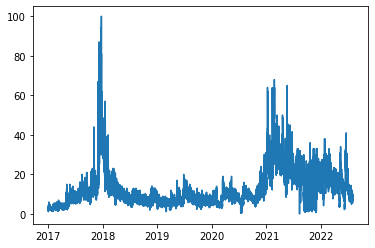

In [39]:
plt.plot_date(hourly['date'], hourly['value_hour'], '-')
plt.show()